# Filmes, part2

In [1]:
import pandas as pd

In [2]:
filmes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv')
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
def limpeza(gen, text):
    gen[text] = gen[text].str.replace(r"|", " ")
    return gen

In [5]:
filmes = limpeza(filmes, 'generos')
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
avaliacoes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv').dropna()
avaliacoes.columns = ['userId', 'filmeId', 'nota', 'timestamp']
avaliacoes

,userId,filmeId,nota,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [7]:
avaliacoes_medias_filmes = avaliacoes.groupby('filmeId')['nota'].mean().round(2)
filmes_medias= filmes.join(avaliacoes_medias_filmes, on="filmeId")
filmes_medias.columns = ['filmeId', 'titulo', 'generos', 'media']
filmes_medias.head(10)

,filmeId,titulo,generos,media
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,3.92
1,2,Jumanji (1995),Adventure Children Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy Romance,3.26
3,4,Waiting to Exhale (1995),Comedy Drama Romance,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.07
5,6,Heat (1995),Action Crime Thriller,3.95
6,7,Sabrina (1995),Comedy Romance,3.19
7,8,Tom and Huck (1995),Adventure Children,2.88
8,9,Sudden Death (1995),Action,3.12
9,10,GoldenEye (1995),Action Adventure Thriller,3.50


## Outra forma de visualização

In [8]:
def plot_filmes(n):
    notas_dos_filmes = avaliacoes.query(f"filmeId == {n}")['nota']
    notas_dos_filmes.plot.box()
    return notas_dos_filmes.describe()

count    203.000000
mean       3.975369
std        0.922429
min        0.500000
25%        3.500000
50%        4.000000
75%        5.000000
max        5.000000
Name: nota, dtype: float64

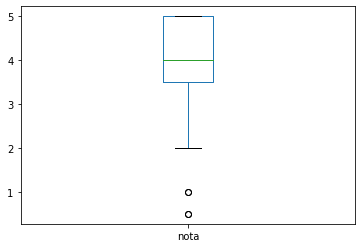

In [9]:
plot_filmes(47)

In [10]:
import seaborn as sns

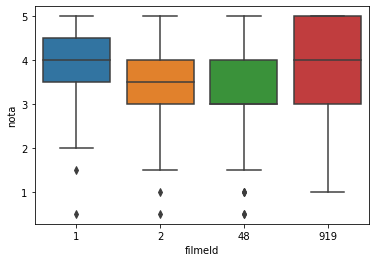

In [12]:
sns.boxplot(data = avaliacoes.query("filmeId in [1,2,919,48]"), x ="filmeId", y="nota")